In [40]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [41]:
df_train = pd.read_csv('./train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [54]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [73]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

survived = 'Survived'
not_survived = 'Not Survived'

fig = make_subplots(rows=1, cols=2, vertical_spacing=0.02,
                    specs=[[{"type": "histogram"}]*2],
                    subplot_titles=("Female", "Male"))

women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']

fig.add_trace(go.Histogram(x=women[women['Survived']==1].Age.dropna(), name=survived, nbinsx=18, showlegend=True, marker_color='blue'), row=1, col=1)
fig.add_trace(go.Histogram(x=women[women['Survived']==0].Age.dropna(), name=not_survived, nbinsx=40, showlegend=True, marker_color='red'), row=1, col=1)
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)

fig.add_trace(go.Histogram(x=men[men['Survived']==1].Age.dropna(), name=survived, nbinsx=18, showlegend=False, marker_color='blue'), row=1, col=2)
fig.add_trace(go.Histogram(x=men[men['Survived']==0].Age.dropna(), name=not_survived, nbinsx=40, showlegend=False, marker_color='red'), row=1, col=2)
fig.update_xaxes(title_text="Age", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)

fig.update_layout(title='Histograms of Age by Survival and Sex',
                  barmode = 'overlay')
fig.update_traces(opacity=0.5)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.




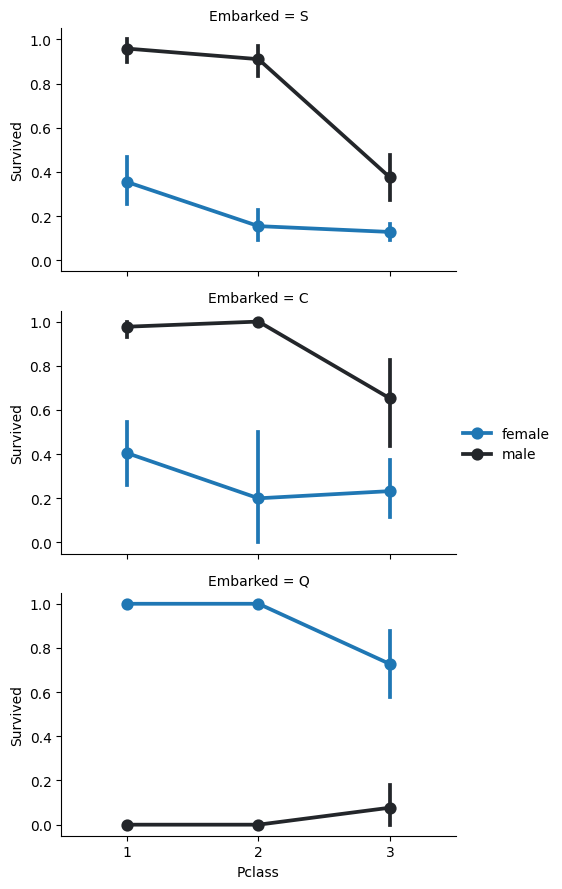

In [80]:
FacetGrid = sns.FacetGrid(df_train, row='Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [83]:
fig = go.Figure(data=[

    go.Bar(x=df_train['Pclass'], y=df_train['Survived'], marker=dict(color='blue'))

])


fig.update_layout(title='Barplot of Survived by Pclass',

                  xaxis_title='Pclass',

                  yaxis_title='Survived')


fig.show()

In [91]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2, vertical_spacing=0.02,
                    specs=[[{"type": "histogram2dcontour"}]*2]*3
                    )

for i, pclass in enumerate(df_train['Pclass'].unique()):
    for j, survived in enumerate(df_train['Survived'].unique()):
        df_subset = df_train[(df_train['Pclass'] == pclass) & (df_train['Survived'] == survived)]
        fig.add_trace(go.Histogram(x=df_subset['Age'], name=f'Pclass={pclass}, Survived={survived}', opacity=0.5, nbinsx=20, ), row=i+1, col=j+1)

fig.update_layout(title='Histograms of Age by Pclass and Survived',
                  xaxis_title='Age',
                  yaxis_title='Count')

fig.show()

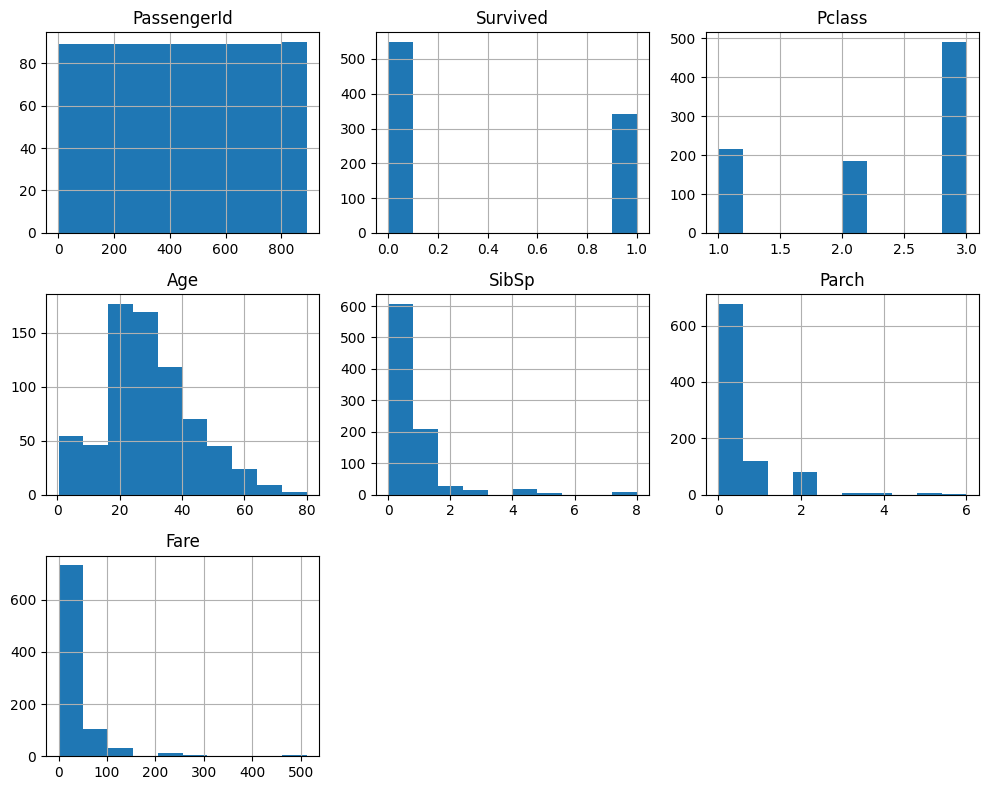

In [7]:
df_train.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

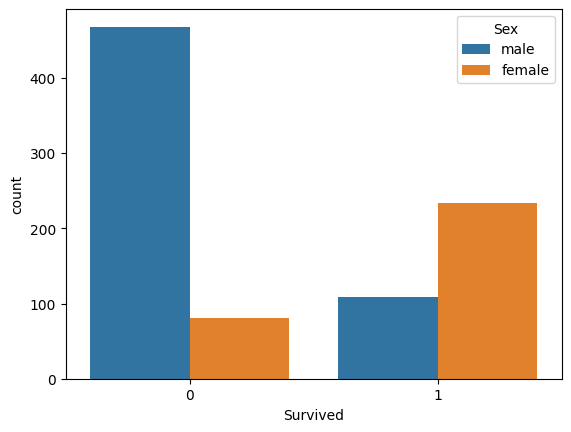

In [8]:
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.show()

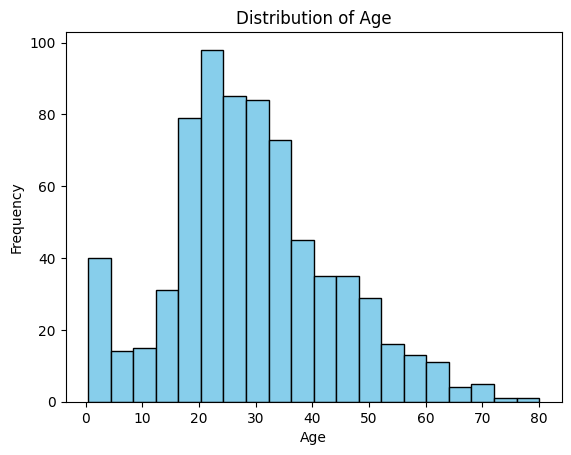

In [9]:
plt.hist(df_train['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

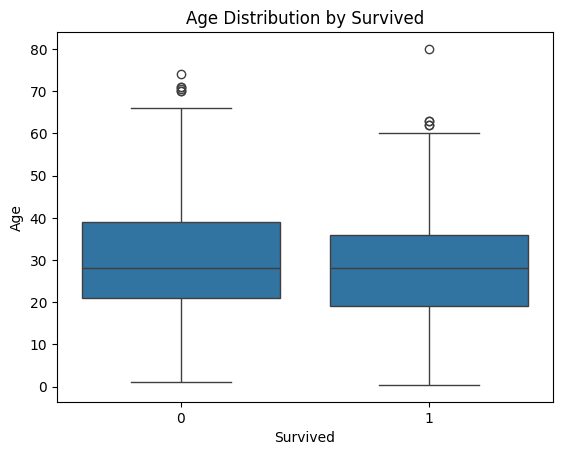

In [10]:
sns.boxplot(x='Survived', y='Age', data=df_train)
plt.title('Age Distribution by Survived')
plt.show()

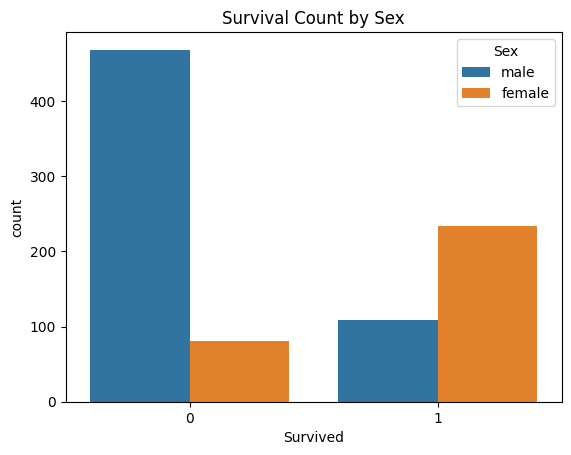

In [11]:
sns.countplot(x='Survived', hue='Sex', data=df_train)
plt.title('Survival Count by Sex')
plt.show()

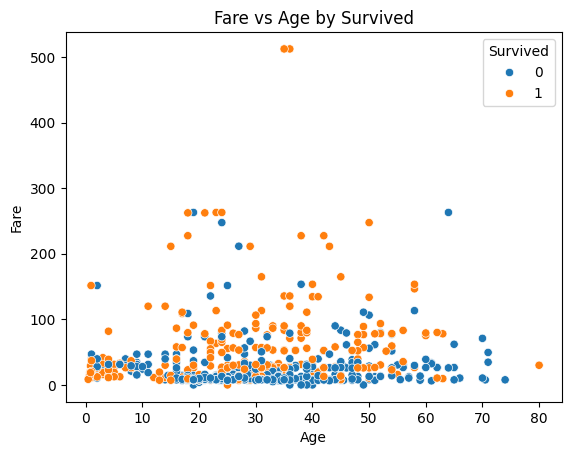

In [14]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_train)
plt.title('Fare vs Age by Survived')
plt.show()


In [12]:
print(df_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


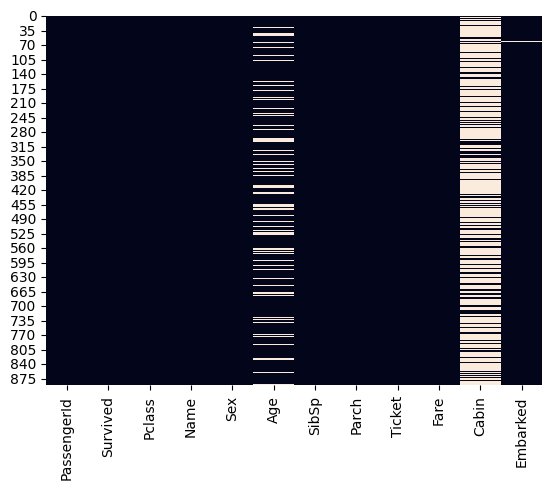

In [13]:
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

In [16]:
correlation_matrix = df_train.corr(numeric_only=True)
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


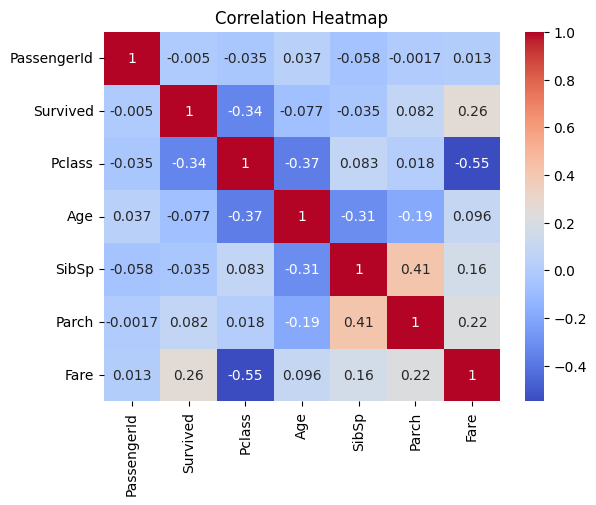

In [17]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df_train['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/mq/yj2k56b52wb8xq_lvbs09rxc0000gn/T/ipykernel_96593/3580007869.py:1: SyntaxWarning: invalid escape sequence '\.'
  df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [20]:
df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df_test['Title'].value_counts())

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/mq/yj2k56b52wb8xq_lvbs09rxc0000gn/T/ipykernel_96593/3021830628.py:1: SyntaxWarning: invalid escape sequence '\.'
  df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [21]:
impute_value = df_train['Age'].median()
df_train['Age'] = df_train['Age'].fillna(impute_value)
df_test['Age'] = df_test['Age'].fillna(impute_value)

In [22]:
df_train['IsFemale'] = (df_train['Sex'] == 'female').astype(int)
df_test['IsFemale'] = (df_test['Sex'] == 'female').astype(int)

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,IsFemale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [24]:
correlation_matrix1 = df_train.corr(numeric_only=True)
print(correlation_matrix1)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   
IsFemale       -0.042939  0.543351 -0.131900 -0.081163  0.114631  0.245489   

                 Fare  IsFemale  
PassengerId  0.012658 -0.042939  
Survived     0.257307  0.543351  
Pclass      -0.549500 -0.131900  
Age          0.096688 -0.081163  
SibSp        0.159651  0.114631  
Parch        0.216225  0.245489  
Fare         1.000000  0.182333  
IsFemale     0.182333  1.

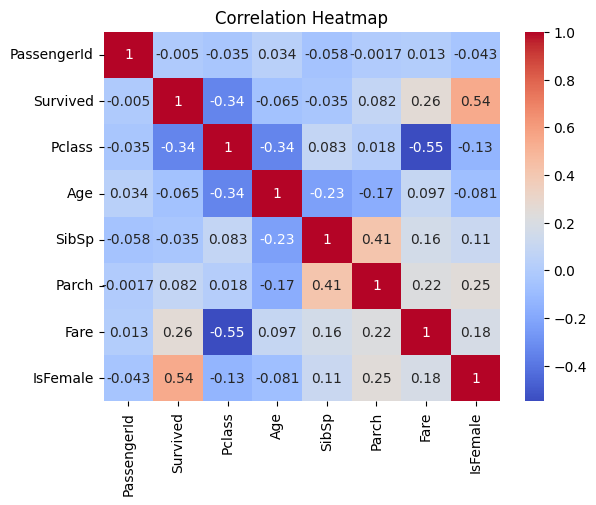

In [25]:
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
predictors = ['Pclass', 'IsFemale', 'Age']
X_train = df_train[predictors].values
X_test = df_test[predictors].values
y_train = df_train['Survived'].values
y_test = df_test['Survived'].values
X_train[:5]

KeyError: 'Survived'

In [30]:
from sklearn.linear_model import LogisticRegression
logR_model = LogisticRegression()

In [31]:
logR_model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_predict = logR_model.predict(X_test)
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [34]:
from sklearn.model_selection import cross_val_score
logR_model1 = LogisticRegression(C=10)
scores = cross_val_score(logR_model1, X_train, y_train, cv=4)
scores

array([0.77578475, 0.79820628, 0.77578475, 0.78828829])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y)
